In [1]:
import pandas as pd
# import numpy as np
import math
t_t =pd.read_csv("train_titanic.csv",sep=",")
data_train = t_t["Pclass"]
get_c =[2,4,5,6,7,11]
x_data = t_t.iloc[:,get_c]
y_data= t_t.iloc[:,1]


In [2]:
def code_sex(sex):
    return (sex=="male")*1
def code_emb(emb):
    if emb=="S":
        return 0
    elif emb=="C":
        return 1
    else: 
        return 2
age_not_nan = x_data[~pd.isna(x_data["Age"])]["Age"]
avg_age = sum(age_not_nan)/len(age_not_nan)
def fix_age(age):
    if math.isnan(age):
        return avg_age
    else:
        return age
x_data["Sex"]=x_data["Sex"].apply(code_sex)
x_data["Embarked"]=x_data["Embarked"].apply(code_emb)
x_data["Age"]=x_data["Age"].apply(fix_age)


E:\Python\Cawler36\venv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Python\Cawler36\venv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Python\Cawler36\venv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [3]:
from sklearn.model_selection import train_test_split
# 回傳: [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.3)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=2)
# 訓練考古題
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(clf, feature_names=["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
                    ,class_names=["die","safe" ], filled=True)
result = graphviz.Source(g)
result.render("titanic")
# result

'titanic.pdf'

In [6]:
# 第二步: 驗證一下公式好壞
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print("正確率:", accuracy_score(pre, y_test) * 100, "%")

正確率: 82.46268656716418 %


In [7]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=2)
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
clu.labels_

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [9]:
from sklearn.metrics import accuracy_score
pre = clu.predict(x_test)
print("正確率:", accuracy_score(pre, y_test) * 100, "%")

正確率: 53.35820895522389 %


In [10]:
from sklearn.metrics import silhouette_score
y = []
x = []
for k in range(2, 10):
    clu = KMeans(n_clusters=k)
    clu.fit(x_train)
    x.append(k)
    y.append(silhouette_score(x_train, clu.labels_))
print(x)
print(y)

[2, 3, 4, 5, 6, 7, 8, 9]
[0.5485113046218342, 0.5494411113194472, 0.5446761124720627, 0.553634164403463, 0.5483688134801541, 0.5036685960311639, 0.4878274382986866, 0.4773740027005062]


Text(0.5, 1.0, 'Sihouette Score V.S. K')

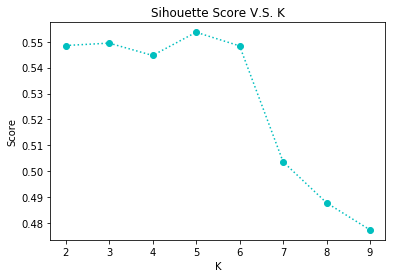

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, "co:")
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Sihouette Score V.S. K")